# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fpp = pd.read_csv('flight_train.csv')
fpp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
fpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
for c in fpp.columns:
    print(c)
    print(fpp[c].unique())
    print('-----------'*20)

Airline
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Date_of_Journey
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/201

In [5]:
# we can grab the route info from total stops so we can drop the route column
# we can drop the route column

In [6]:
fpp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
fpp.dropna(inplace=True)

In [8]:
fpp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# data preprocessing

In [9]:
fpp2 = fpp.copy()

In [10]:
fpp = pd.get_dummies(fpp, prefix = ['Airline','Source','Destination','Additional_Info'],
                     prefix_sep='_',
                     columns = ['Airline','Source','Destination','Additional_Info'], drop_first= True)

In [11]:
fpp['Total_Stops'].replace({
    'non-stop': 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
}, inplace = True)

In [12]:
# splitting data into day, month and year
fpp['Date_of_Journey'] = pd.to_datetime(fpp['Date_of_Journey'])
fpp['Day'] = fpp['Date_of_Journey'].dt.day
fpp['Month'] = fpp['Date_of_Journey'].dt.month
fpp['Year'] = fpp['Date_of_Journey'].dt.year

In [13]:
fpp['Arrival_Time'] = pd.to_datetime(fpp['Arrival_Time'])
fpp['Dep_Time'] = pd.to_datetime(fpp['Dep_Time'])

fpp['arv_hour'] = fpp['Arrival_Time'].dt.hour
fpp['arv_min'] = fpp['Arrival_Time'].dt.minute

fpp['dep_hour'] = fpp['Dep_Time'].dt.hour
fpp['dep_min'] = fpp['Dep_Time'].dt.minute

In [14]:
def time_converter(x):
    if len(x.split()) == 2:
        hour = int(x.split()[0][:-1])
        min = int(x.split()[1][:-1])
        return hour*60 + min
    else:
        return int(x[:-1])*60

In [15]:
fpp['Duration'] = fpp['Duration'].apply(time_converter)

In [16]:
fpp.drop(['Date_of_Journey','Route',], axis =1, inplace=True)

In [17]:
fpp['Year'].value_counts()

2019    10682
Name: Year, dtype: int64

In [18]:
# the data belongs to year 2019 only so we can drop the column as year is constant and can create major impact on model price prediction

In [19]:
fpp.head(2)

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Day,Month,Year,arv_hour,arv_min,dep_hour,dep_min
0,2021-06-20 22:20:00,2021-03-22 01:10:00,170,0,3897,0,0,1,0,0,...,0,1,0,24,3,2019,1,10,22,20
1,2021-06-20 05:50:00,2021-06-20 13:15:00,445,2,7662,1,0,0,0,0,...,0,1,0,5,1,2019,13,15,5,50


# EDA

<AxesSubplot:>

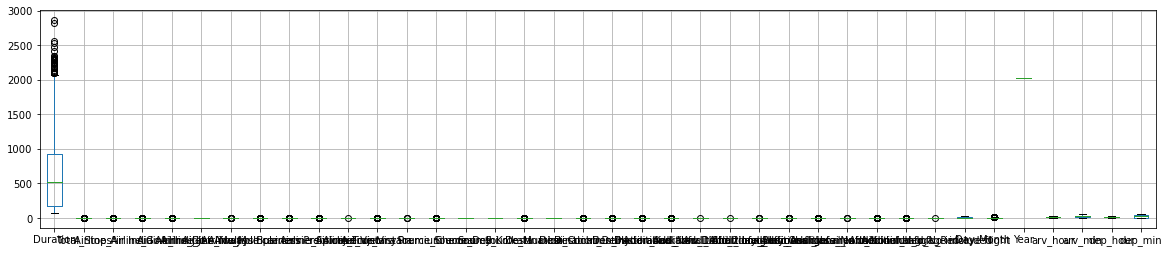

In [20]:
plt.figure(figsize=(20,4))
fpp.drop('Price', axis =1).boxplot()

In [21]:
# no column has outliers in it
# duration is in minutes so it showing outlying values
# hence we will check for outliers and skewness

In [22]:
from scipy.stats import zscore
z = np.abs(zscore(fpp['Duration']))
print(np.where(z>3))

(array([  226,   553,   966,   969,  1067,  1113,  1346,  1442,  1496,
        1551,  1657,  1791,  1804,  2172,  2553,  2641,  2654,  2718,
        3457,  3790,  3815,  3966,  4047,  4118,  4463,  4655,  5516,
        5701,  5711,  5782,  5933,  5953,  6059,  6085,  6321,  6476,
        6884,  7189,  7232,  7306,  7329,  7553,  7611,  7612,  7876,
        7906,  8127,  8153,  8360,  8409,  8412,  8601,  8621,  8698,
        8729,  9246,  9395,  9483,  9550,  9672,  9702,  9847, 10019,
       10325, 10455, 10638], dtype=int64),)


In [23]:
fpp2.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


<AxesSubplot:xlabel='Airline', ylabel='Price'>

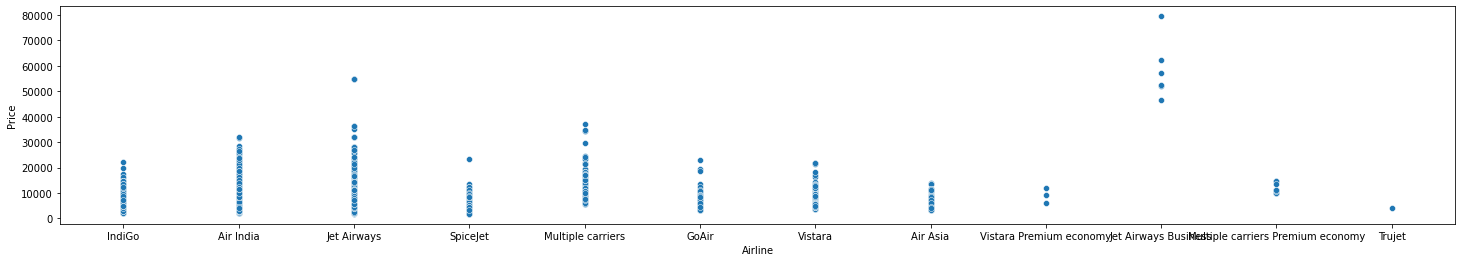

In [24]:
plt.figure(figsize=(25,4))
sns.scatterplot(x='Airline', y = 'Price', data = fpp2)

Obs-:
jet airways premium economy has higher price as compared to other's premium economy

<AxesSubplot:xlabel='Duration', ylabel='Price'>

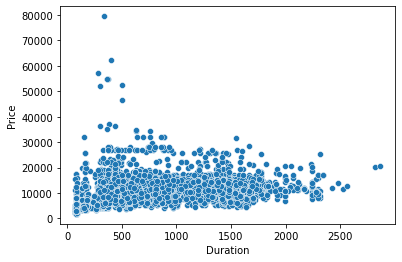

In [25]:
sns.scatterplot(x = 'Duration', y = 'Price', data = fpp)

<AxesSubplot:xlabel='Duration', ylabel='Count'>

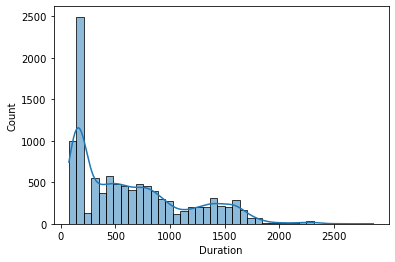

In [26]:
sns.histplot(x='Duration', data = fpp, kde = True)

C:\Users\DeLL\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Duration', ylabel='Count'>

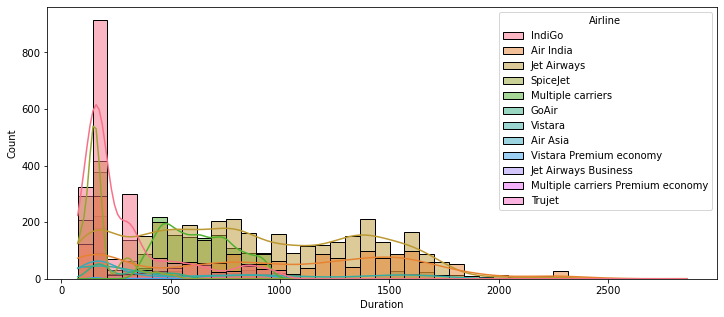

In [27]:
plt.figure(figsize=(12,5))
sns.histplot(x='Duration', data = fpp, kde = True, hue = fpp2['Airline'])

1. indigo have shorter flight durations and people prefer most that flight
2. jet airways have all durations flight, yet not only the smallest duration

<AxesSubplot:xlabel='Airline', ylabel='Price'>

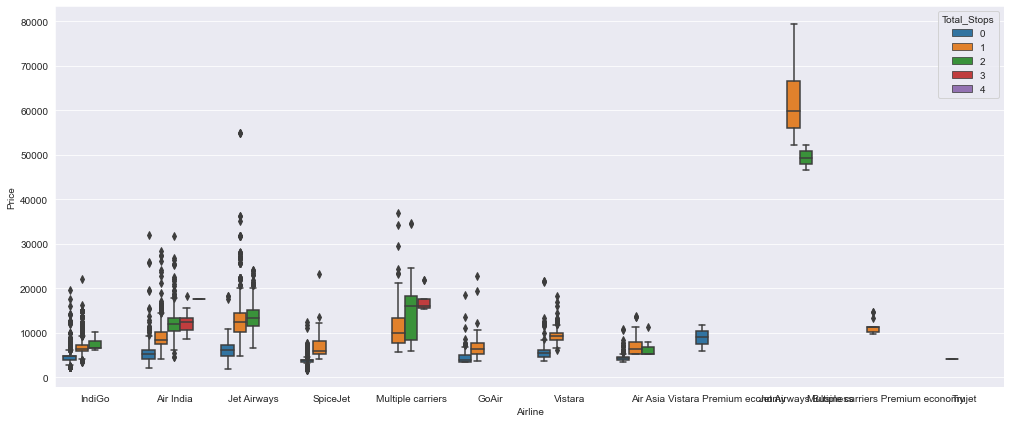

In [30]:
plt.figure(figsize=(17,7))
sns.set_style('darkgrid')
sns.boxplot(x = 'Airline', y='Price', data = fpp2, hue = fpp['Total_Stops'])

1. multiple carriers do not have non-stop flights
2. many flights have very much fluctuations in price (hence dynamic pricing is applicable here)

In [31]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Airline', ylabel='count'>

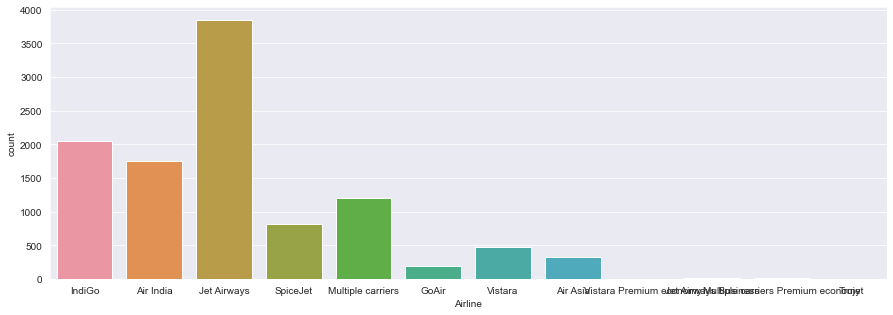

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(fpp2['Airline'])

<AxesSubplot:xlabel='Source', ylabel='count'>

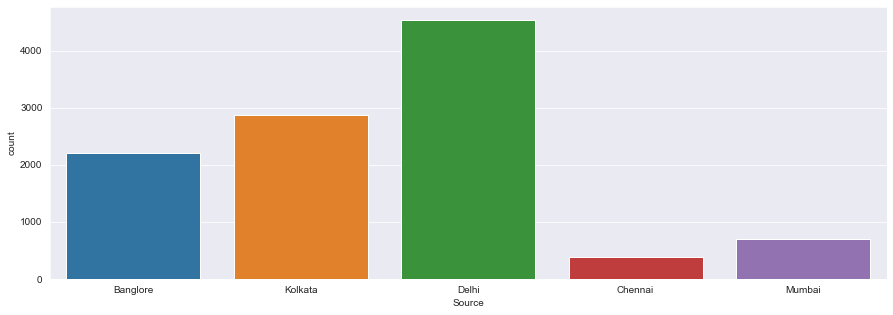

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(fpp2['Source'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

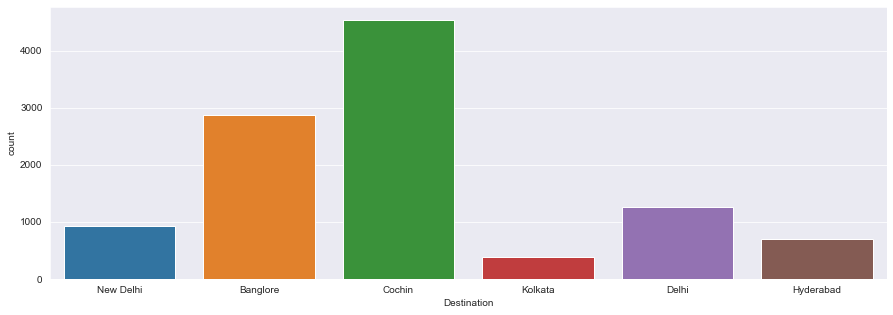

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(fpp2['Destination'])

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

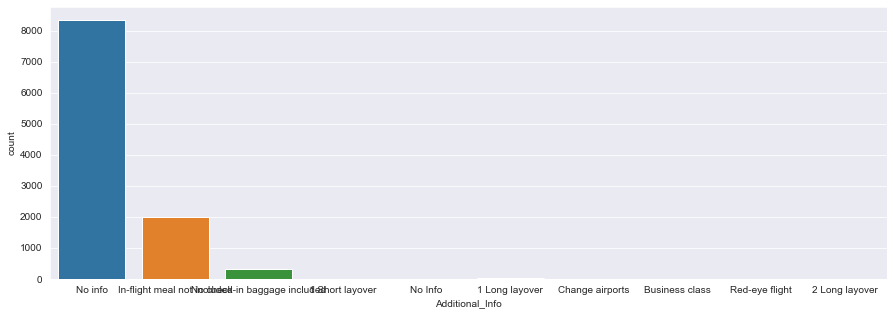

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(fpp2['Additional_Info'])

In [36]:
# in additional info first three are only the major category

In [37]:
fpp.skew()

Duration                                          0.861541
Total_Stops                                       0.317109
Price                                             1.812405
Airline_Air India                                 1.815902
Airline_GoAir                                     7.217685
Airline_IndiGo                                    1.562601
Airline_Jet Airways                               0.581943
Airline_Jet Airways Business                     42.164359
Airline_Multiple carriers                         2.461548
Airline_Multiple carriers Premium economy        28.616840
Airline_SpiceJet                                  3.185036
Airline_Trujet                                  103.353761
Airline_Vistara                                   4.399205
Airline_Vistara Premium economy                  59.654559
Source_Chennai                                    5.008071
Source_Delhi                                      0.304968
Source_Kolkata                                    1.0433

In [38]:
# defining x and y

In [39]:
X = fpp.drop(['Year','Dep_Time', 'Arrival_Time','Price'],axis = 1)
y = fpp.Price

In [40]:
X

,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Day,Month,arv_hour,arv_min,dep_hour,dep_min
0,170,0,0,0,1,0,0,0,0,0,...,0,0,1,0,24,3,1,10,22,20
1,445,2,1,0,0,0,0,0,0,0,...,0,0,1,0,5,1,13,15,5,50
2,1140,2,0,0,0,1,0,0,0,0,...,0,0,1,0,6,9,4,25,9,25
3,325,1,0,0,1,0,0,0,0,0,...,0,0,1,0,5,12,23,30,18,5
4,285,1,0,0,1,0,0,0,0,0,...,0,0,1,0,3,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,0,0,0,0,0,0,0,0,...,0,0,1,0,4,9,22,25,19,55
10679,155,0,1,0,0,0,0,0,0,0,...,0,0,1,0,27,4,23,20,20,45
10680,180,0,0,0,0,1,0,0,0,0,...,0,0,1,0,27,4,11,20,8,20
10681,160,0,0,0,0,0,0,0,0,0,...,0,0,1,0,3,1,14,10,11,30


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_cols = X[['Duration', 'Day', 'Month','arv_hour', 'arv_min', 'dep_hour', 'dep_min']]
for i in scale_cols:
    X[i] = scaler.fit_transform(X[i].to_numpy().reshape(-1,1))

In [42]:
X.head(2)

,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Day,Month,arv_hour,arv_min,dep_hour,dep_min
0,-0.931601,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1.285536,-0.848450,-1.800436,-0.890014,1.654154,-0.234950
1,-0.390028,2,1,0,0,0,0,0,0,0,...,0,0,1,0,-0.872724,-1.517909,-0.050909,-0.587094,-1.303113,1.363607


In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(7156, 37)
(3526, 37)
(7156,)
(3526,)


In [45]:
lr = LinearRegression()
ls = Lasso()
rg = Ridge()
en = ElasticNet()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()
knr = KNeighborsRegressor()

In [46]:
models = [lr,ls,rg,en,rfr,abr,etr,gbr,xgbr,knr]
for i in models:
    i.fit(X_train,y_train)
    pred_i = i.predict(X_test)
    
    print(f'Model Report {i}')
    print('MAE:', mean_absolute_error(y_test,pred_i))
    print('MSE: ', mean_squared_error(y_test,pred_i))
    print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_i)))
    print('R2 SCORE:', r2_score(y_test,pred_i))

    print('xxxxx'*20)
    print('\n')

Model Report LinearRegression()
MAE: 1750.4080948780988
MSE:  6241661.943589392
RMSE: 2498.3318321610905
R2 SCORE: 0.6890594726074366
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


Model Report Lasso()
MAE: 1752.9755152520088
MSE:  6230820.348162923
RMSE: 2496.1611222360875
R2 SCORE: 0.6895995677664104
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


Model Report Ridge()
MAE: 1752.4287605692273
MSE:  6209984.388857471
RMSE: 2491.984026605602
R2 SCORE: 0.6906375515972747
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


Model Report ElasticNet()
MAE: 2388.7979033369925
MSE:  10702825.404652972
RMSE: 3271.517293955967
R2 SCORE: 0.4668179395182813
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


Model Report RandomForestRegressor()
MAE: 676.4924317833959
MSE:  2066806.1610718

on the basis of r2 score and less error value, we selected 4 models for next to check the cross val score.

In [47]:
rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)
cv = cross_val_score(rfr,X,y, cv=5)
print('CV values:', cv)
print('CV mean value:', cv.mean())

CV values: [0.88877861 0.89138063 0.91638843 0.90140242 0.87444038]
CV mean value: 0.8944780926816269


In [48]:
etr.fit(X_train,y_train)
pred_etr = etr.predict(X_test)
cv = cross_val_score(etr,X,y, cv=5)
print('CV values:', cv)
print('CV mean value:', cv.mean())

CV values: [0.88826144 0.90463093 0.91316016 0.89455144 0.88055844]
CV mean value: 0.8962324819851913


In [49]:
gbr.fit(X_train,y_train)
pred_gbr = gbr.predict(X_test)
cv = cross_val_score(gbr,X,y, cv=5)
print('CV values:', cv)
print('CV mean value:', cv.mean())

CV values: [0.80977332 0.80466371 0.83279235 0.83174394 0.83172313]
CV mean value: 0.822139293190917


In [50]:
xgbr.fit(X_train,y_train)
pred_xgbr = xgbr.predict(X_test)
cv = cross_val_score(xgbr,X,y, cv=5)
print('CV values:', cv)
print('CV mean value:', cv.mean())

[14:46:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CV values: [0.80843821 0.81384176 0.82848846 0.82628243 0.82550505]
CV mean value: 0.8205111799865048


we are selecting two models which is random forest regressor and extra tree regressor based on the cross validation score we get.

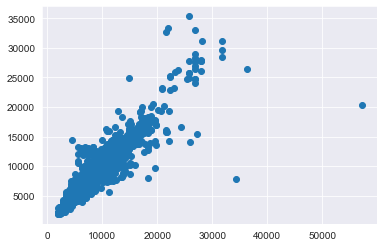

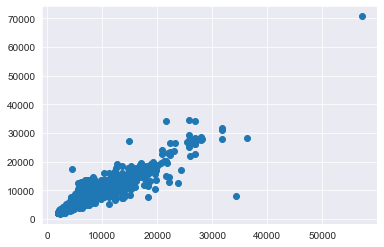

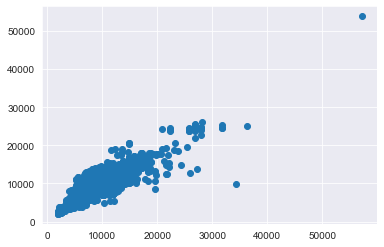

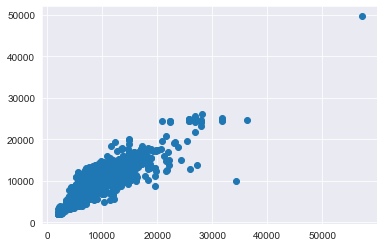

In [51]:
for i in [pred_rfr,pred_etr,pred_gbr,pred_xgbr]:
    plt.figure()
    plt.scatter(y_test, i)
    print('\n')

In [52]:
etr.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
param = {
    'criterion': ['mse','mae'],
    'max_depth': [5,8,10],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4,6],
    'n_estimators': [100,250,500],
    'verbose': [0,1,10]
}

In [ ]:
rdsr_rfr = RandomizedSearchCV(estimator=rfr, param_distributions=param)
rdsr_rfr.fit(X_train,y_train)
# the output was very long which can display in github

In [56]:
print(rdsr_rfr.best_params_)
print(rdsr_rfr.best_score_)

{'verbose': 0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'mae'}
0.832309325991611


In [57]:
pred_rdsr_rfr = rdsr_rfr.predict(X_test)
print('MAE:', mean_absolute_error(y_test,pred_rdsr_rfr))
print('MSE: ', mean_squared_error(y_test,pred_rdsr_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_rdsr_rfr)))
print('R2 SCORE:', r2_score(y_test,pred_rdsr_rfr))

MAE: 883.703823028928
MSE:  2576278.6111335927
RMSE: 1605.0790046392085
R2 SCORE: 0.8716576710985104


# saving the best model

In [58]:
import joblib
joblib.dump(rdsr_rfr, 'rdsr_rfr_file.obj')

['rdsr_rfr_file.obj']

# test set 

In [61]:
fpp = pd.read_csv('flight_test.csv')

In [62]:
fpp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [63]:
fpp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [65]:
fpp = pd.get_dummies(fpp, prefix = ['Airline','Source','Destination','Additional_Info'],
                     prefix_sep='_',
                     columns = ['Airline','Source','Destination','Additional_Info'], drop_first= True)

In [66]:
fpp['Total_Stops'].replace({
    'non-stop': 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
}, inplace = True)

In [67]:
# splitting data into day, month and year
fpp['Date_of_Journey'] = pd.to_datetime(fpp['Date_of_Journey'])
fpp['Day'] = fpp['Date_of_Journey'].dt.day
fpp['Month'] = fpp['Date_of_Journey'].dt.month
fpp['Year'] = fpp['Date_of_Journey'].dt.year

In [68]:
fpp['Arrival_Time'] = pd.to_datetime(fpp['Arrival_Time'])
fpp['Dep_Time'] = pd.to_datetime(fpp['Dep_Time'])

fpp['arv_hour'] = fpp['Arrival_Time'].dt.hour
fpp['arv_min'] = fpp['Arrival_Time'].dt.minute

fpp['dep_hour'] = fpp['Dep_Time'].dt.hour
fpp['dep_min'] = fpp['Dep_Time'].dt.minute

In [69]:
def time_converter(x):
    if len(x.split()) == 2:
        hour = int(x.split()[0][:-1])
        min = int(x.split()[1][:-1])
        return hour*60 + min
    else:
        return int(x[:-1])*60

fpp['Duration'] = fpp['Duration'].apply(time_converter)

In [70]:
fpp.drop(['Date_of_Journey','Route',], axis =1, inplace=True)

In [73]:
fpp.drop(['Year','Dep_Time', 'Arrival_Time'],axis = 1, inplace = True)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_cols = X[['Duration', 'Day', 'Month','arv_hour', 'arv_min', 'dep_hour', 'dep_min']]
for i in scale_cols:
    X[i] = scaler.fit_transform(X[i].to_numpy().reshape(-1,1))

In [76]:
fpp

,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Day,Month,arv_hour,arv_min,dep_hour,dep_min
0,655,1,0,0,0,1,0,0,0,0,...,0,0,0,1,6,6,4,25,17,30
1,240,1,0,0,1,0,0,0,0,0,...,0,0,0,1,5,12,10,20,6,20
2,1425,1,0,0,0,1,0,0,0,0,...,0,1,0,0,21,5,19,0,19,15
3,780,1,0,0,0,0,0,1,0,0,...,0,0,0,1,21,5,21,0,8,0
4,170,0,0,0,0,0,0,0,0,0,...,0,0,0,1,24,6,2,45,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1435,1,1,0,0,0,0,0,0,0,...,0,0,0,1,6,6,20,25,20,30
2667,155,0,0,0,1,0,0,0,0,0,...,0,0,0,1,27,3,16,55,14,20
2668,395,1,0,0,0,1,0,0,0,0,...,0,0,0,1,3,6,4,25,21,50
2669,915,1,1,0,0,0,0,0,0,0,...,0,0,0,1,3,6,19,15,4,0


In [78]:
X.columns

Index(['Duration', 'Total_Stops', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight', 'Day',
       'Month', 'arv_hour', 'arv_min', 'dep_hour', 'dep_min'],
      dtype='object')

In [79]:
fpp.columns

Index(['Duration', 'Total_Stops', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Day', 'Month', 'arv_hour', 'arv_min',
       'dep_hour', 'dep_min'],
      dtype='object')

In [83]:
fpp['Airline_Turjet'] = 0
fpp['Airline_vistara'] = 0
fpp['Additional_Info_1 Short layover']=0
fpp['Additional_Info_2 Long layover']=0
fpp['Additional_Info_No Info']=0
fpp.head(2)

,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Month,arv_hour,arv_min,dep_hour,dep_min,Airline_Turjet,Airline_vistara,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_No Info
0,655,1,0,0,0,1,0,0,0,0,...,6,4,25,17,30,0,0,0,0,0
1,240,1,0,0,1,0,0,0,0,0,...,12,10,20,6,20,0,0,0,0,0


In [85]:
test_predict = rdsr_rfr.predict(fpp)

In [89]:
test_prediction = pd.DataFrame(test_predict)

In [91]:
test_prediction.to_csv('test_prediction.csv')

# --------------------------------------------------END----------------------------------------------------